In [1]:
import os
import re
import pandas as pd
import numpy as np
import sys
import glob
import traceback

sys.path.append('/lib')
import lib.helper as helper

%matplotlib inline

In [2]:
# Set an absolute or relative path to instructor data extracted from AMY that you want to run analyses over
instructors_file = "data/raw/carpentry-instructors_GB_2019-08-01.csv"

In [3]:
instructors_df = pd.read_csv(instructors_file, encoding = "utf-8")

      number_of_instructors
year                       
2012                      5
2013                     11
2014                     22
2015                     21
2016                     25
2017                     45
2018                     41
2019                     27


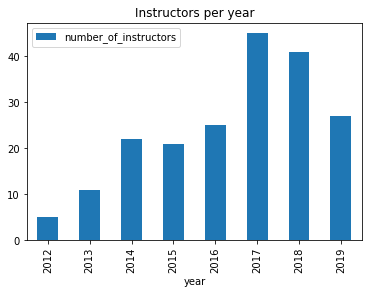

In [4]:
# How many instructors are there for each year?
instructors_per_year = instructors_df['year-earliest-instructor-badge-awarded'].value_counts()
instructors_per_year.sort_index(ascending = True, inplace=True)
instructors_per_year.index.name = 'year'
instructors_per_year = instructors_per_year.to_frame('number_of_instructors')
print(instructors_per_year)
instructors_per_year.plot(kind='bar', legend=True, title ="Instructors per year")

For institution "University of Florida" we do not have the normalised name information. Setting the institution to "Unknown" ...

For institution "Cancer Research UK Cambridge Institute" we do not have the normalised name information. Setting the institution to "Unknown" ...

For institution "Cancer Research UK Cambridge Institute" we do not have the normalised name information. Setting the institution to "Unknown" ...

For institution "Owen Stephens Consulting Ltd" we do not have the normalised name information. Setting the institution to "Unknown" ...

For institution "Cancer Research UK Cambridge Institute" we do not have the normalised name information. Setting the institution to "Unknown" ...

For institution "The University of sheffield" we do not have the normalised name information. Setting the institution to "Unknown" ...

Imperial College London                                                                          21
University College London                               

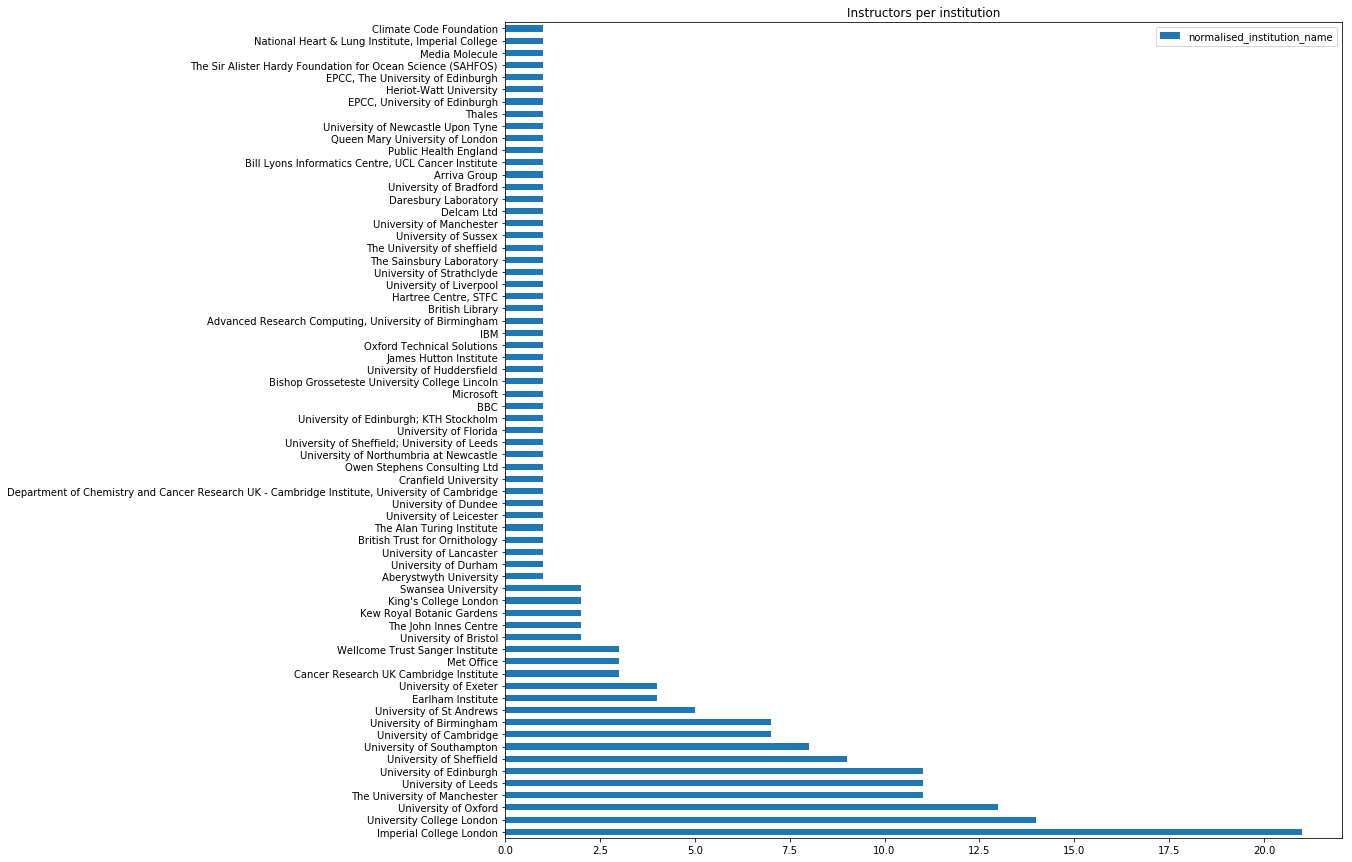

In [5]:
# How many instructors are there at each institution?

# Insert normalised/official names for institutions (for UK academic institutions)
instructors_df = helper.insert_normalised_institution(instructors_df, "affiliation")
        
instructors_per_institution = instructors_df['normalised_institution_name'].value_counts()
print(instructors_per_institution)
instructors_per_institution.plot(kind='barh', legend=True, title ="Instructors per institution", figsize = (15,15))

In [6]:
# How are instructors spread over UK regions?

# Insert UK regional info based on instructors's affiliations or nearest airport
# First insert latitude, longitude pairs for instructors' institutions
instructors_df = helper.insert_institutional_geocoordinates(instructors_df)
instructors_df = helper.insert_uk_region(instructors_df)
print("Finished inserting regions for instructors.")

Looking up region for geocoordinates: (51.524774, -0.133401)
Looking up region for airport LHR
Looking up region for airport LHR
Looking up region for airport MAN
Looking up region for airport EXT
Looking up region for airport LGW
Looking up region for airport LHR
Looking up region for airport EDI
Looking up region for airport SOU
Looking up region for airport LGW
Looking up region for airport ADX
Looking up region for airport LHR
Looking up region for airport LHR
Looking up region for airport MAN
Looking up region for airport DSA
Looking up region for airport EDI
Looking up region for geocoordinates: (51.609621999999995, -3.9806489999999997)
Looking up region for airport LHR
Looking up region for airport EDI
Looking up region for airport STN
Looking up region for airport GLA
Looking up region for geocoordinates: (56.341205, -2.793016)
Looking up region for airport BHX
Looking up region for airport STN
Looking up region for airport BHX
Looking up region for airport MAN
Looking up regio

London                       54
North West                   26
Scotland                     24
Eastern                      20
Yorkshire and The Humber     17
South East                   15
West Midlands                14
South West                   12
Not in a UK region/online     8
North East                    3
Wales                         2
East Midlands                 2
Name: region, dtype: int64


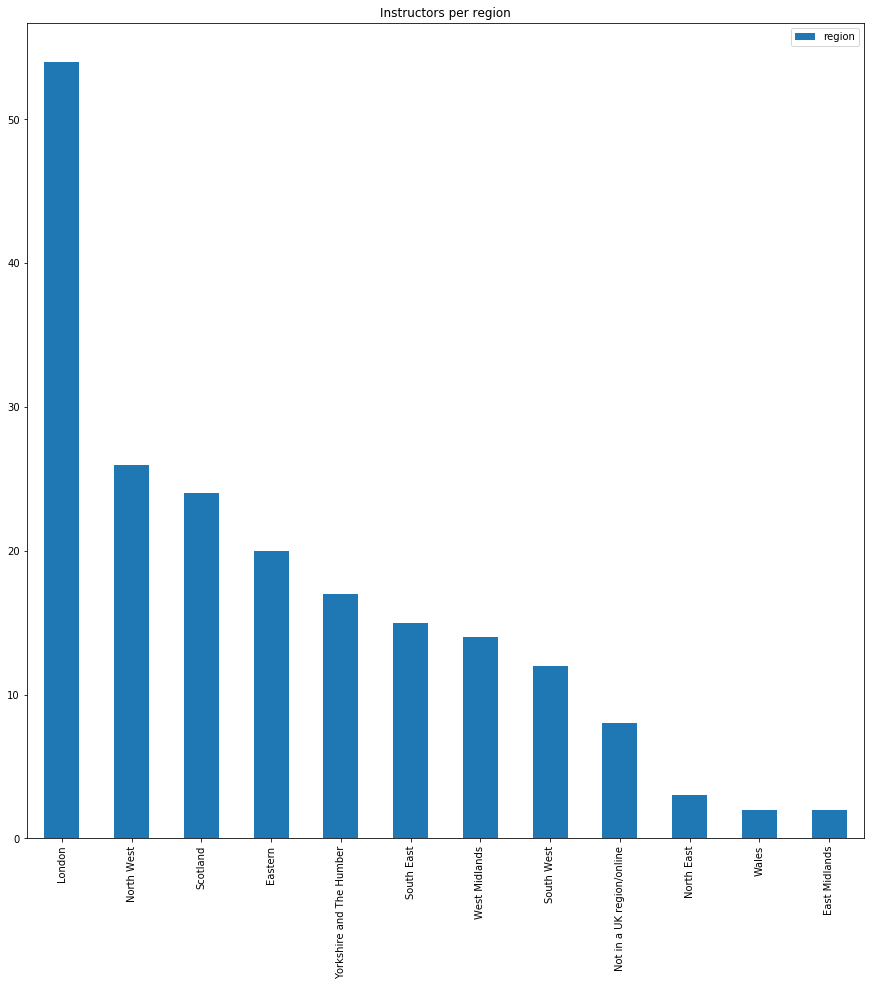

In [7]:
instructors_per_region = instructors_df['region'].value_counts()
print(instructors_per_region)
instructors_per_region.plot(kind='bar', legend=True, title ="Instructors per region", figsize = (15,15))

In [8]:
# Save all analyses into an Excel spreadsheet
ANALYSES_DIR = "data/analyses/"
if not os.path.exists(ANALYSES_DIR):
    os.makedirs(ANALYSES_DIR)

instructors_file_name = os.path.basename(instructors_file)
instructors_file_name_without_extension = re.sub('\.csv$', '', instructors_file_name.strip())
instructors_analyses_excel_file = ANALYSES_DIR + "analysed_" + instructors_file_name_without_extension + '_from_ipynb.xlsx'

excel_writer = pd.ExcelWriter(instructors_analyses_excel_file, engine='xlsxwriter')

instructors_df.to_excel(excel_writer, sheet_name="carpentry_instructors", index=False)

# Instructors per year
instructors_per_year.to_excel(excel_writer, sheet_name='instructors_per_year', index=True)
workbook = excel_writer.book
worksheet = excel_writer.sheets['instructors_per_year']
chart = workbook.add_chart({'type': 'column'})
chart.add_series({
        'categories': ['instructors_per_year', 1, 0, len(instructors_per_year.index), 0],
        'values': ['instructors_per_year', 1, 1, len(instructors_per_year.index), 1],
        'gap': 2,
    })
chart.set_y_axis({'major_gridlines': {'visible': False}})
chart.set_legend({'position': 'none'})
chart.set_x_axis({'name': 'Year'})
chart.set_y_axis({'name': 'Number of instructors', 'major_gridlines': {'visible': False}})
chart.set_title({'name': 'Number of instructors per year'})
worksheet.insert_chart('I2', chart)



# Instructors per institution
instructors_per_institution.to_excel(excel_writer, sheet_name='instructors_per_institution', index=True)
workbook = excel_writer.book
worksheet = excel_writer.sheets['instructors_per_institution']
chart = workbook.add_chart({'type': 'column'})
chart.add_series({
        'categories': ['instructors_per_institution', 1, 0, len(instructors_per_institution.index), 0],
        'values': ['instructors_per_institution', 1, 1, len(instructors_per_institution.index), 1],
        'gap': 2,
    })
chart.set_y_axis({'major_gridlines': {'visible': False}})
chart.set_legend({'position': 'none'})
chart.set_x_axis({'name': 'Host institution'})
chart.set_y_axis({'name': 'Number of workshops', 'major_gridlines': {'visible': False}})
chart.set_title({'name': 'Number of instructors per host'})
worksheet.insert_chart('I2', chart)

excel_writer.save()
print("Saved instructors analyses in " + instructors_analyses_excel_file)

Saved instructors analyses in data/analyses/analysed_carpentry-instructors_GB_2019-08-01_from_ipynb.xlsx
